In [1]:
from mplsoccer import Pitch,VerticalPitch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
data = pd.read_csv('15min.csv')


In [3]:
data


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Away,Charyl,Pass,0,0,60,49,71,28
1,Away,Elias,Pass,0,0,70,30,58,45
2,Away,Charyl,Pass,0,0,59,44,46,32
3,Away,Siwakorn,Pass,0,0,41,26,30,25
4,Home,Aris,foul,0,0,28,23,0,0
...,...,...,...,...,...,...,...,...,...
164,Away,Elias,Cross,15,50,56,26,31,11
165,Home,Chaiyawat,getball,15,50,29,25,0,0
166,Home,Nopphon,getball,15,50,32,30,0,0
167,Home,Chaiyawat,Pass,15,50,33,29,41,7


In [4]:
data['X'] = data['X']*1.2
data['Y'] = data['Y']*.8
data['X2'] = data['X2']*1.2
data['Y2'] = data['Y2']*.8

In [5]:
dataHome = data[data['Team'] == 'Home' ]
dataAway = data[data['Team'] == 'Away' ]

In [6]:
dataHome

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
4,Home,Aris,foul,0,0,33.6,18.4,0.0,0.0
6,Home,Saksit,clear,0,47,9.6,36.8,0.0,0.0
8,Home,Saksit,clear,1,11,6.0,40.8,0.0,0.0
10,Home,Chayawat,block,1,11,10.8,34.4,0.0,0.0
11,Home,Chayawat,clear,1,11,13.2,36.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...
161,Home,Chaiyawat,Pass,15,50,30.0,2.4,37.2,10.4
162,Home,Yuto,Cross,15,50,36.0,11.2,66.0,18.4
165,Home,Chaiyawat,getball,15,50,34.8,20.0,0.0,0.0
166,Home,Nopphon,getball,15,50,38.4,24.0,0.0,0.0


In [7]:
dataHomeShot = dataHome[(dataHome['Event'] == 'ShotOnTarget') |  (dataHome['Event'] == 'ShotOffTarget') |
                         (dataHome['Event'] == 'ShotGetGoal') | (dataHome['Event'] == 'ShotBlock')]

In [33]:
 dataHomeShot= dataHomeShot.reset_index()

In [34]:
dataHomeShot

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,71,Home,Nopphon,ShotOffTarget,5,31,87.6,22.4,0.0,0.0
1,121,Home,Chaiyawat,ShotOnTarget,10,29,85.2,31.2,0.0,0.0
2,145,Home,Yuto,ShotOffTarget,11,47,93.6,18.4,0.0,0.0


In [9]:
dataAwayShot = dataAway[(dataAway['Event'] == 'ShotOnTarget') |  (dataAway['Event'] == 'ShotOffTarget') |
                        (dataAway['Event'] == 'ShotGetGoal') | (dataAway['Event'] == 'ShotBlock')]

In [70]:
dataAwayShot

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,9,Away,Go,ShotBlock,1,11,15.6,34.4,0.0,0.0
1,159,Away,Patino,ShotBlock,15,50,9.6,27.2,0.0,0.0


In [69]:
 dataAwayShot= dataAwayShot.reset_index()

In [11]:
dataHomePass = dataHome[(dataHome['Event'] == 'Pass') |  (dataHome['Event'] == 'Through') |
                         (dataHome['Event'] == 'go') | (dataHome['Event'] == 'Cross')]

In [12]:
dataHomePass = dataHomePass.reset_index()
dataHomePass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,18,Home,Yuto,Cross,1,11,12.0,44.8,46.8,59.2
1,20,Home,Nopphon,Pass,1,11,28.8,71.2,22.8,76.0
2,21,Home,Suphanan,Pass,2,34,18.0,72.0,4.8,76.8
3,22,Home,Saksit,Cross,2,34,4.8,76.0,45.6,58.4
4,32,Home,Yuto,Pass,2,34,57.6,42.4,54.0,46.4
...,...,...,...,...,...,...,...,...,...,...
68,151,Home,Jaroensak,Cross,12,31,79.2,10.4,88.8,22.4
69,157,Home,Aris,Cross,15,50,34.8,16.0,74.4,26.4
70,161,Home,Chaiyawat,Pass,15,50,30.0,2.4,37.2,10.4
71,162,Home,Yuto,Cross,15,50,36.0,11.2,66.0,18.4


In [13]:
dataAwayPass = dataAway[(dataAway['Event'] == 'Pass') |  (dataAway['Event'] == 'Through') |
                         (dataAway['Event'] == 'go') | (dataAway['Event'] == 'Cross')]

In [14]:
dataAwayPass = dataAwayPass.reset_index()
dataAwayPass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,0,Away,Charyl,Pass,0,0,72.0,39.2,85.2,22.4
1,1,Away,Elias,Pass,0,0,84.0,24.0,69.6,36.0
2,2,Away,Charyl,Pass,0,0,70.8,35.2,55.2,25.6
3,3,Away,Siwakorn,Pass,0,0,49.2,20.8,36.0,20.0
4,12,Away,Philip,Pass,1,11,32.4,31.2,28.8,49.6
5,15,Away,Bordin,Pass,1,11,21.6,54.4,8.4,65.6
6,16,Away,Jaturapat,Through,1,11,7.2,63.2,12.0,43.2
7,19,Away,Rochela,Pass,1,11,45.6,60.0,28.8,72.0
8,23,Away,Rochela,Pass,2,34,48.0,56.8,26.4,68.8
9,24,Away,Charyl,Pass,2,34,25.2,69.6,33.6,72.0


In [15]:
dataAwayDef= dataAway[(dataAway['Event'] == 'clear') |  (dataAway['Event'] == 'intercept') |
                         (dataAway['Event'] == 'getball') | (dataAway['Event'] == 'block')|
                      (dataAway['Event'] == 'yellow')| (dataAway['Event'] == 'foul')]

In [16]:
dataAwayDef = dataAwayDef.reset_index()
dataAwayDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,14,Away,Bordin,getball,1,11,26.4,52.0,0.0,0.0
1,51,Away,Go,intercept,3,18,86.4,56.8,0.0,0.0
2,97,Away,Elias,intercept,6,48,110.4,35.2,0.0,0.0
3,99,Away,Elias,clear,8,28,117.6,32.0,0.0,0.0
4,115,Away,Go,intercept,9,34,88.8,7.2,0.0,0.0
5,127,Away,Elias,intercept,10,29,73.2,40.0,0.0,0.0
6,152,Away,Go,intercept,12,31,90.0,24.0,0.0,0.0
7,156,Away,Pakorn,foul,14,43,40.8,6.4,0.0,0.0
8,163,Away,Elias,intercept,15,50,66.0,19.2,0.0,0.0
9,168,Away,Philip,clear,15,50,49.2,4.8,0.0,0.0


In [17]:
dataHomeDef= dataHome[(dataHome['Event'] == 'clear') |  (dataHome['Event'] == 'intercept') |
                         (dataHome['Event'] == 'getball') | (dataHome['Event'] == 'block')|
                      (dataHome['Event'] == 'yellow')| (dataHome['Event'] == 'foul')]

In [18]:
dataHomeDef = dataHomeDef.reset_index()
dataHomeDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,4,Home,Aris,foul,0,0,33.6,18.4,0.0,0.0
1,6,Home,Saksit,clear,0,47,9.6,36.8,0.0,0.0
2,8,Home,Saksit,clear,1,11,6.0,40.8,0.0,0.0
3,10,Home,Chayawat,block,1,11,10.8,34.4,0.0,0.0
4,11,Home,Chayawat,clear,1,11,13.2,36.8,0.0,0.0
5,13,Home,Chayawat,intercept,1,11,26.4,49.6,0.0,0.0
6,17,Home,Yuto,intercept,1,11,13.2,43.2,0.0,0.0
7,31,Home,Yuto,intercept,2,34,58.8,42.4,0.0,0.0
8,39,Home,Suphanan,intercept,3,18,28.8,51.2,0.0,0.0
9,42,Home,Eliandro,foul,3,18,56.4,24.0,0.0,0.0


In [56]:
shX = dataHomeShot['X']
shY = dataHomeShot['Y']
shName = dataHomeShot['Player']
shsty = dataHomeShot['Event']

In [57]:
shX

0    87.6
1    85.2
2    93.6
Name: X, dtype: float64

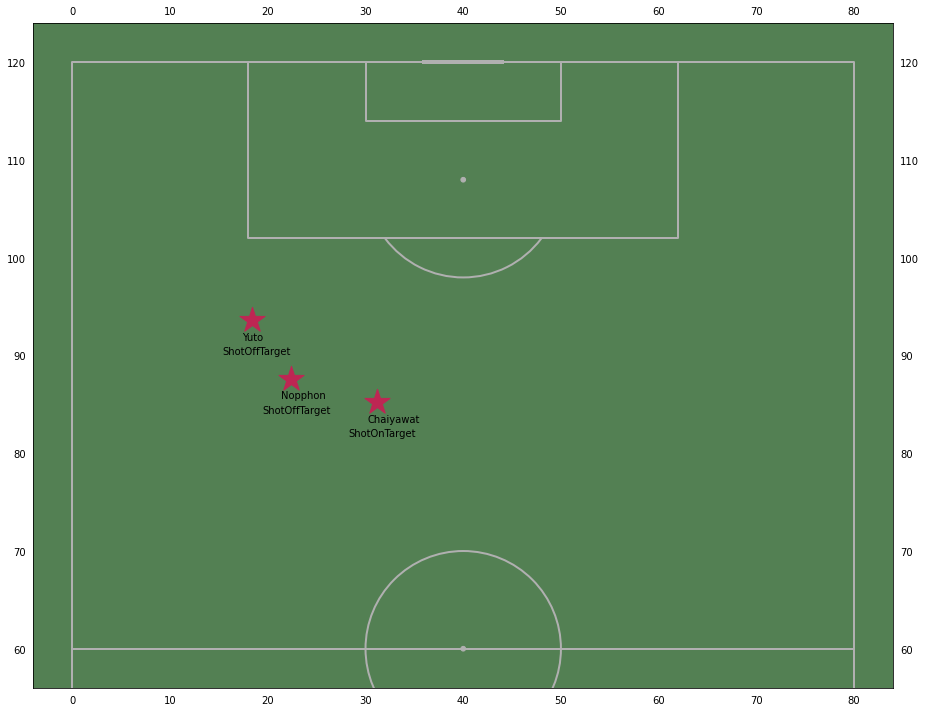

In [68]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=True)
fig,ax =pitch.draw(figsize =(20,10))
    
plt.scatter(dataHomeShot['Y'],dataHomeShot['X'],c='#BE2653',s = 700,marker = "*")

for i in range(len(shX)):
    plt.text(shY[i]-1,shX[i]-2,shName[i])
    plt.text(shY[i]-3,shX[i]-3.5,shsty[i])

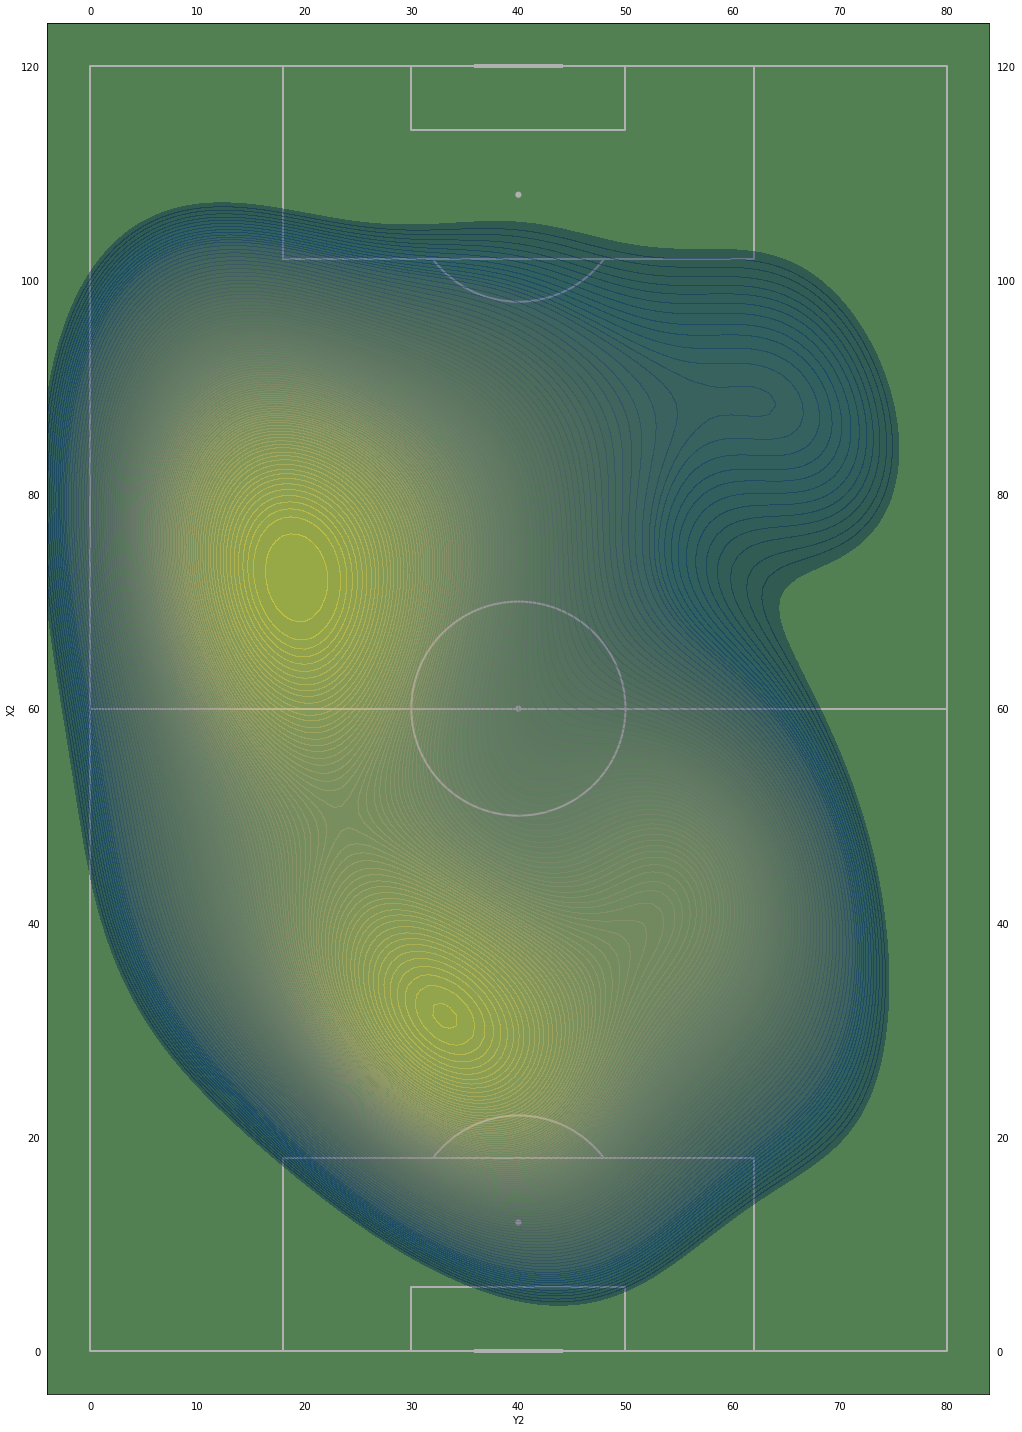

In [48]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))    

kde = sns.kdeplot(x = dataHomePass['Y2'], y = dataHomePass['X2'],
                  fill = True,shade_lowest= False,common_grid= False,
                  alpha=.4,thresh=.2,n_levels=100,cmap = 'cividis')


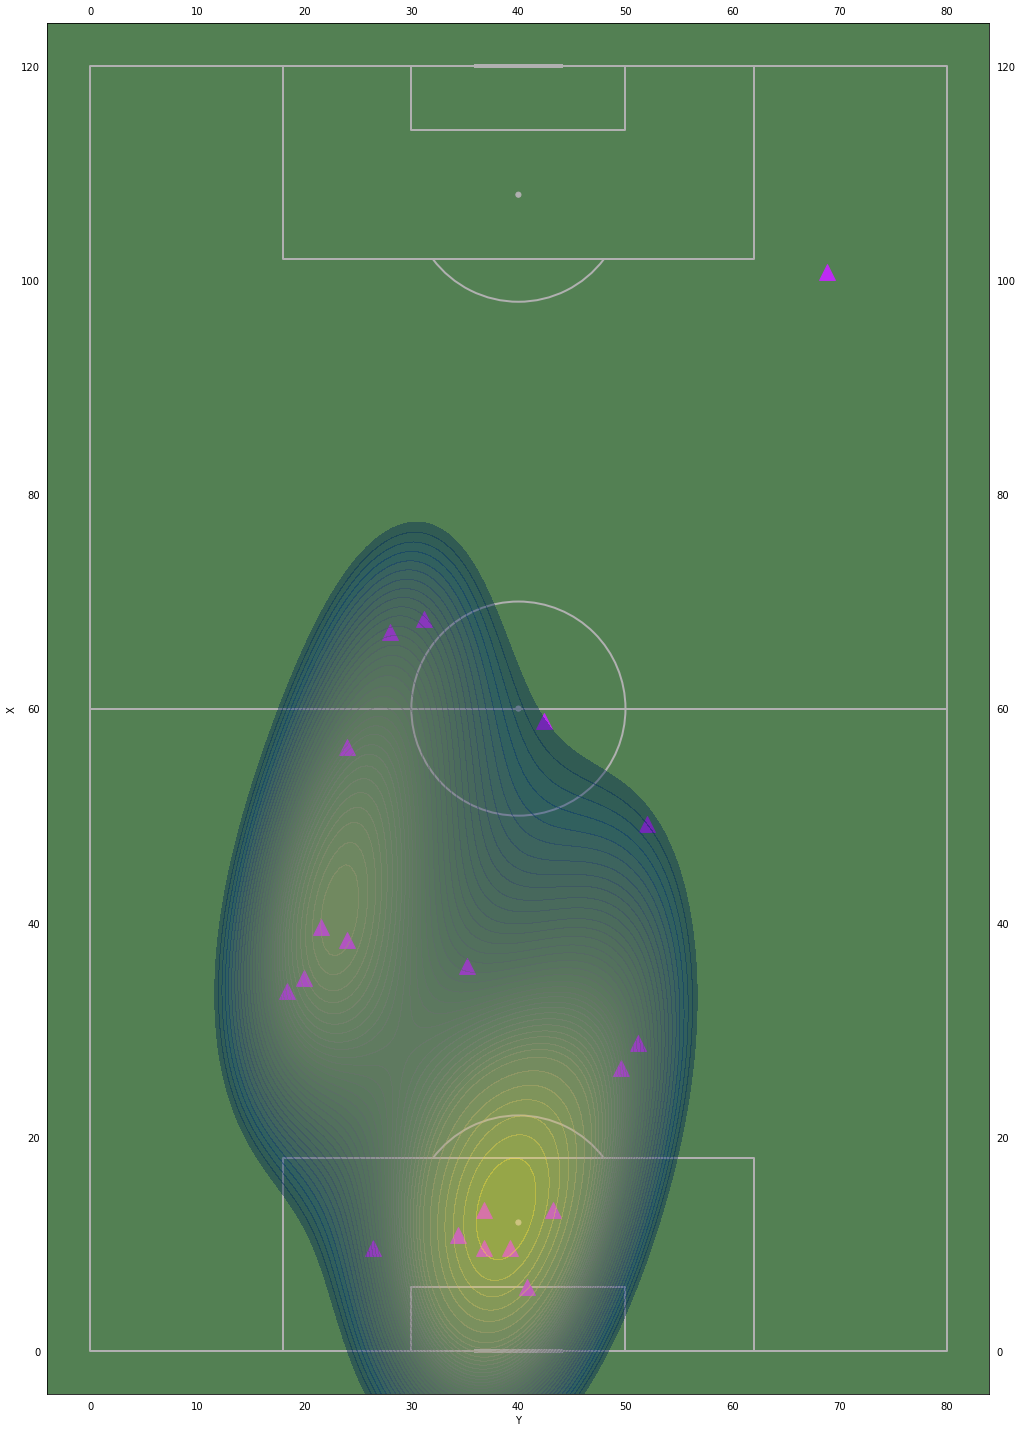

In [21]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomeDef['Y'],dataHomeDef['X'],c='#BE2AF3',s = 250,marker = "^")

kde = sns.kdeplot(x = dataHomeDef['Y'], y = dataHomeDef['X'],
                  fill = True,shade_lowest= False,common_grid= False,
                  alpha=.4,thresh=.3,n_levels=40,cmap = 'cividis')

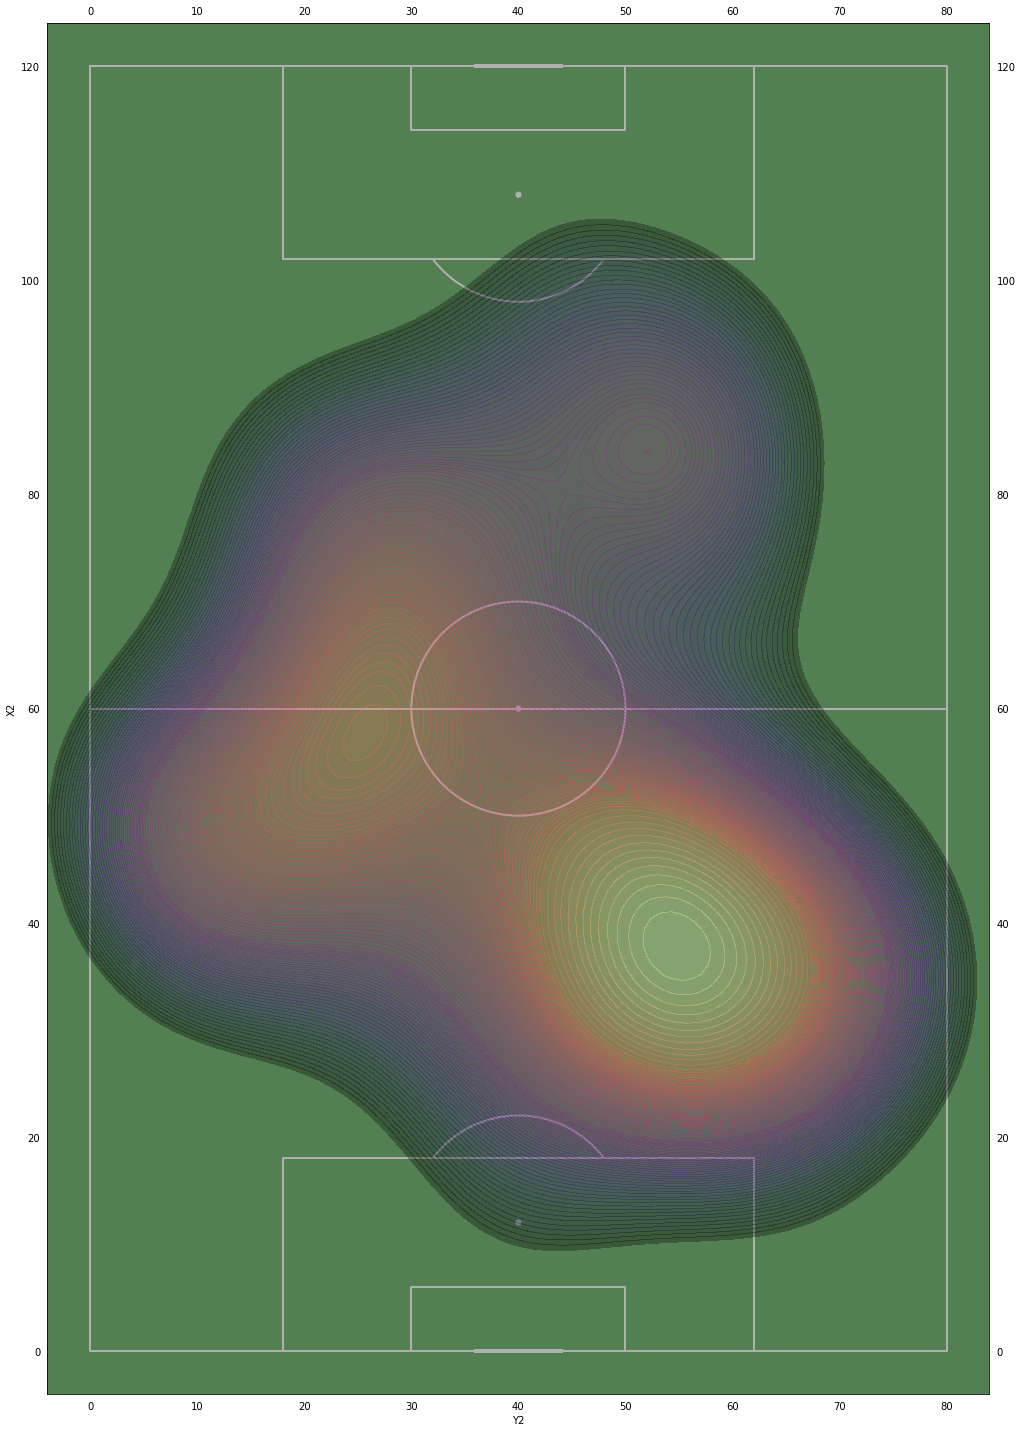

In [78]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    


kde = sns.kdeplot(x = dataAwayPass['Y2'], y = dataAwayPass['X2'],
                  fill = True,shade_lowest=False,common_grid=False,
                  alpha=.3,thresh=.2
                  ,n_levels=100,cmap = 'magma')


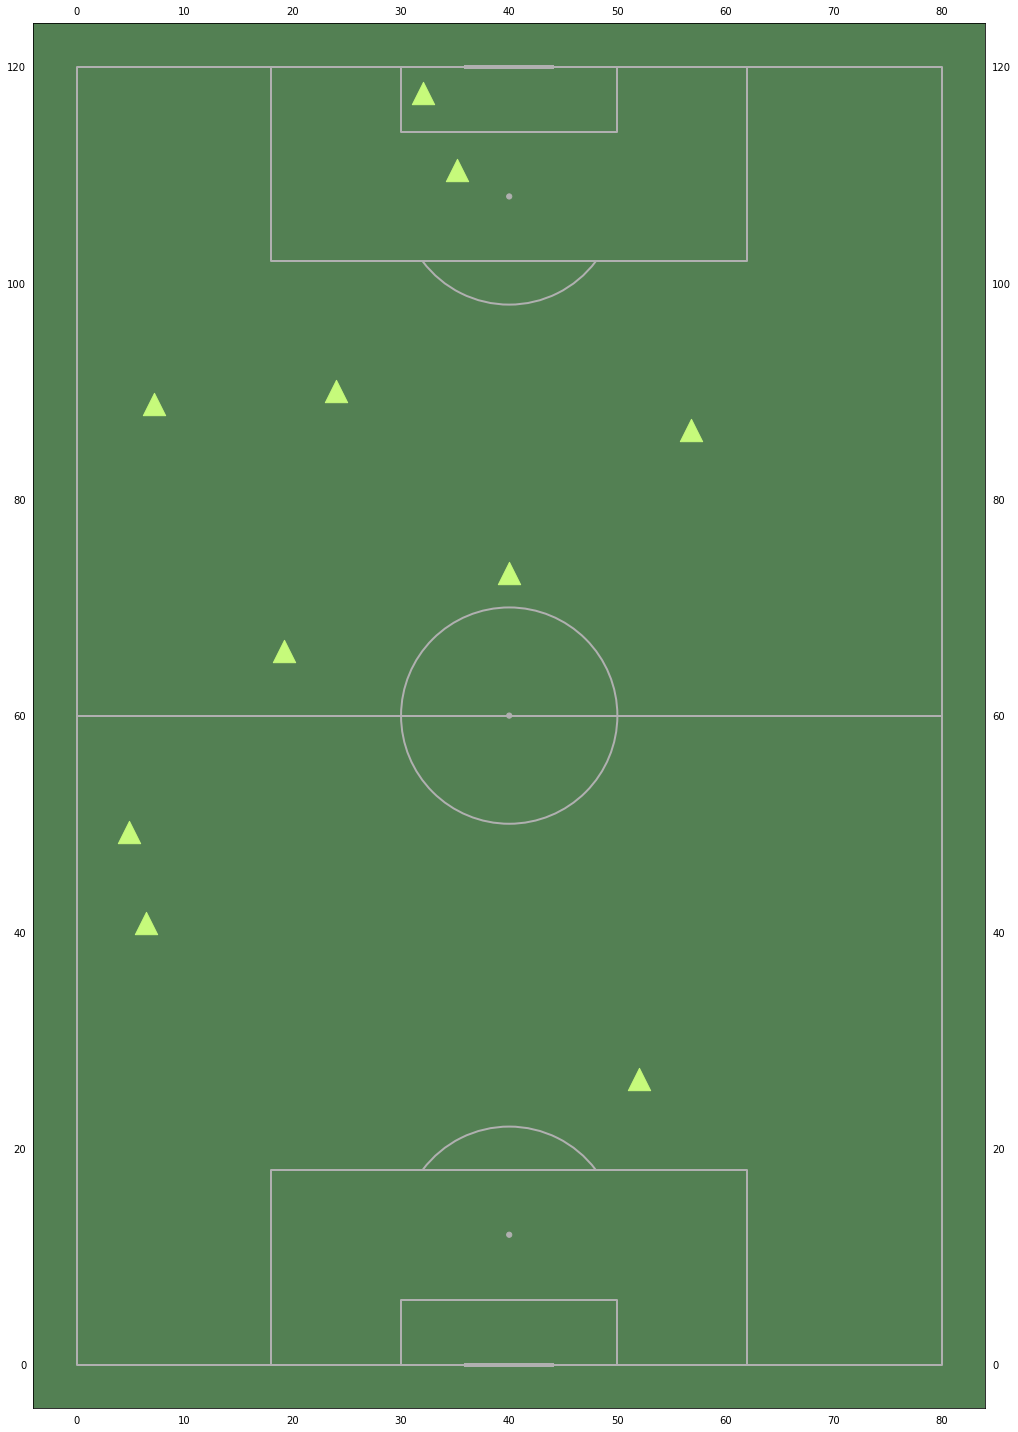

In [84]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#C6FA7B',s = 500,marker = "^")


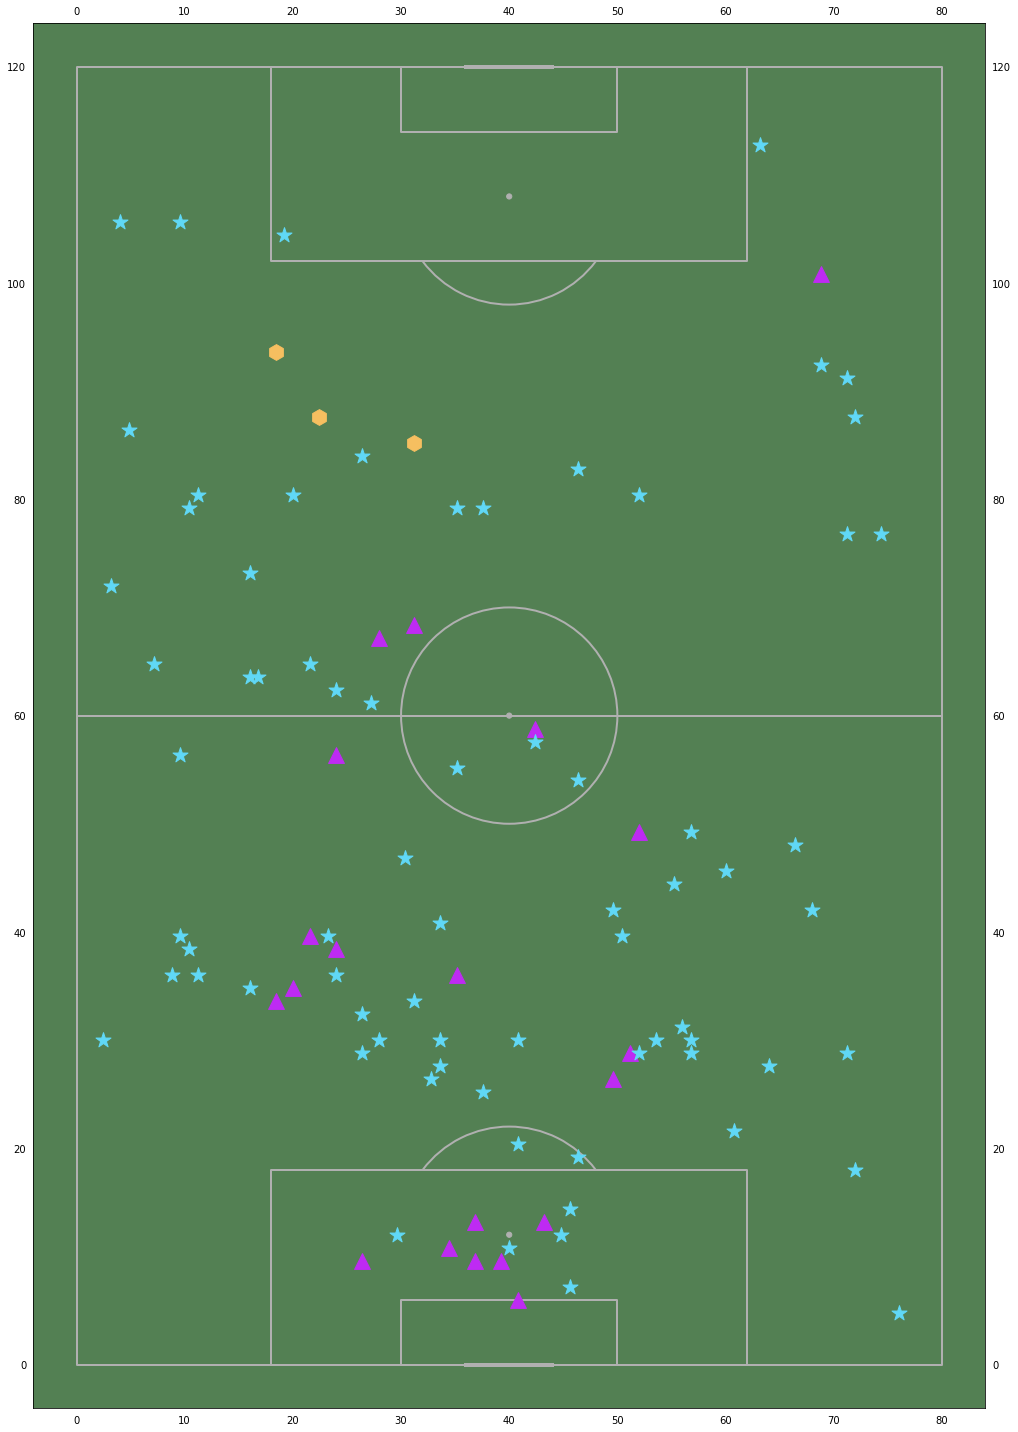

In [24]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomeDef['Y'],dataHomeDef['X'],c='#BE2AF3',s = 250,marker = "^")

plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#60D8F6',s = 250 ,marker = '*')

plt.scatter(dataHomeShot['Y'],dataHomeShot['X'],c='#F6BF60',s = 250,marker = "h")


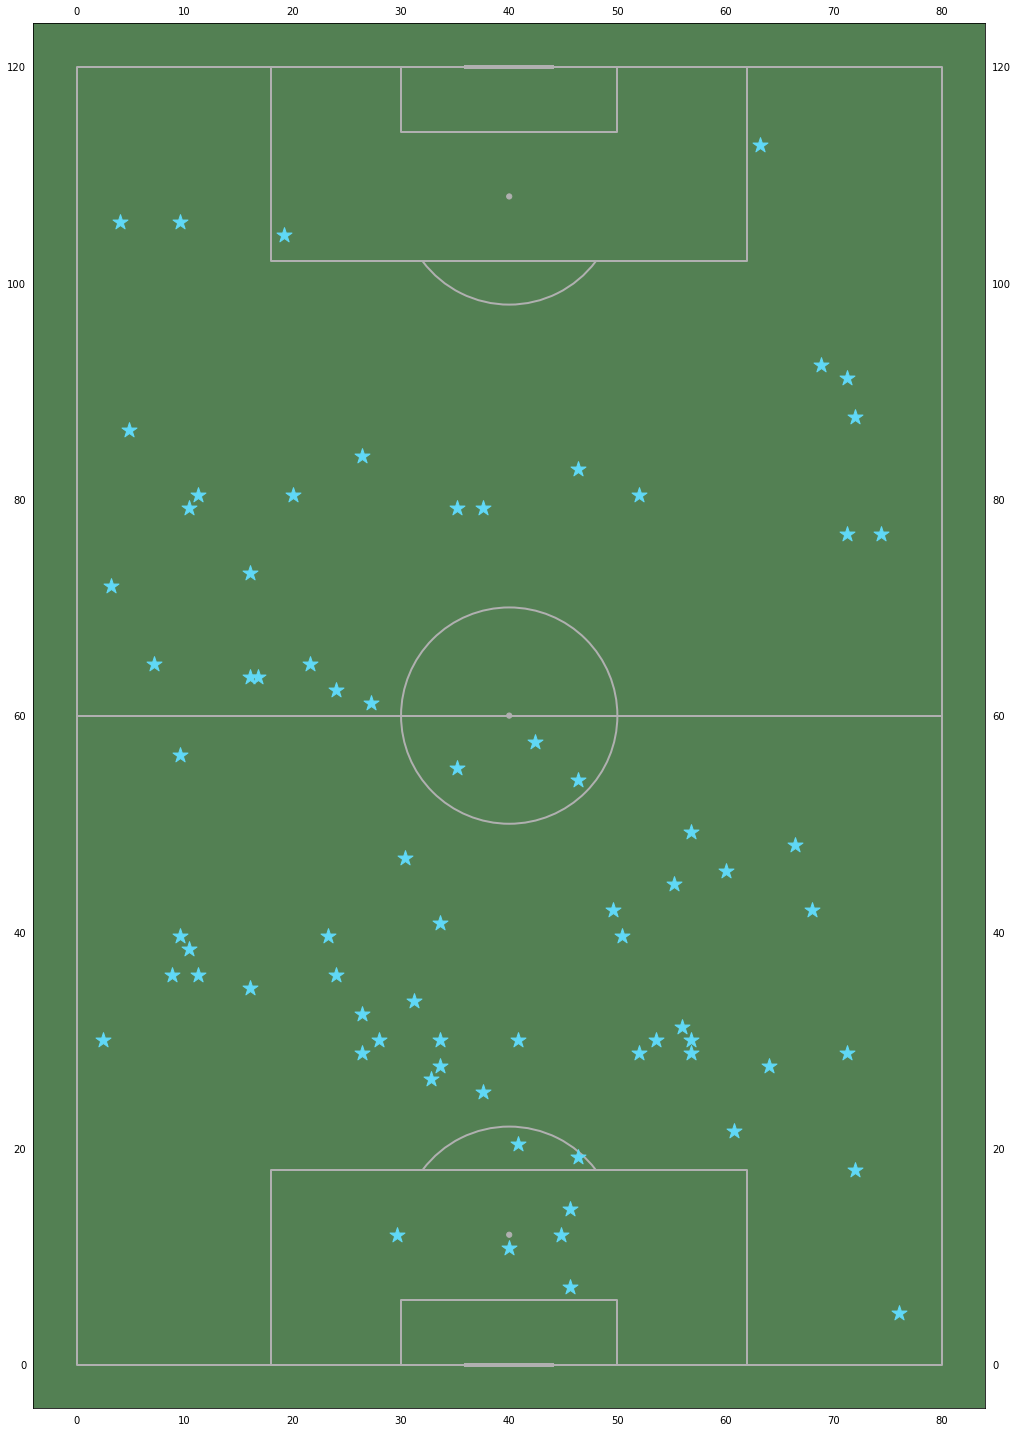

In [43]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#60D8F6',s = 250 ,marker = '*')

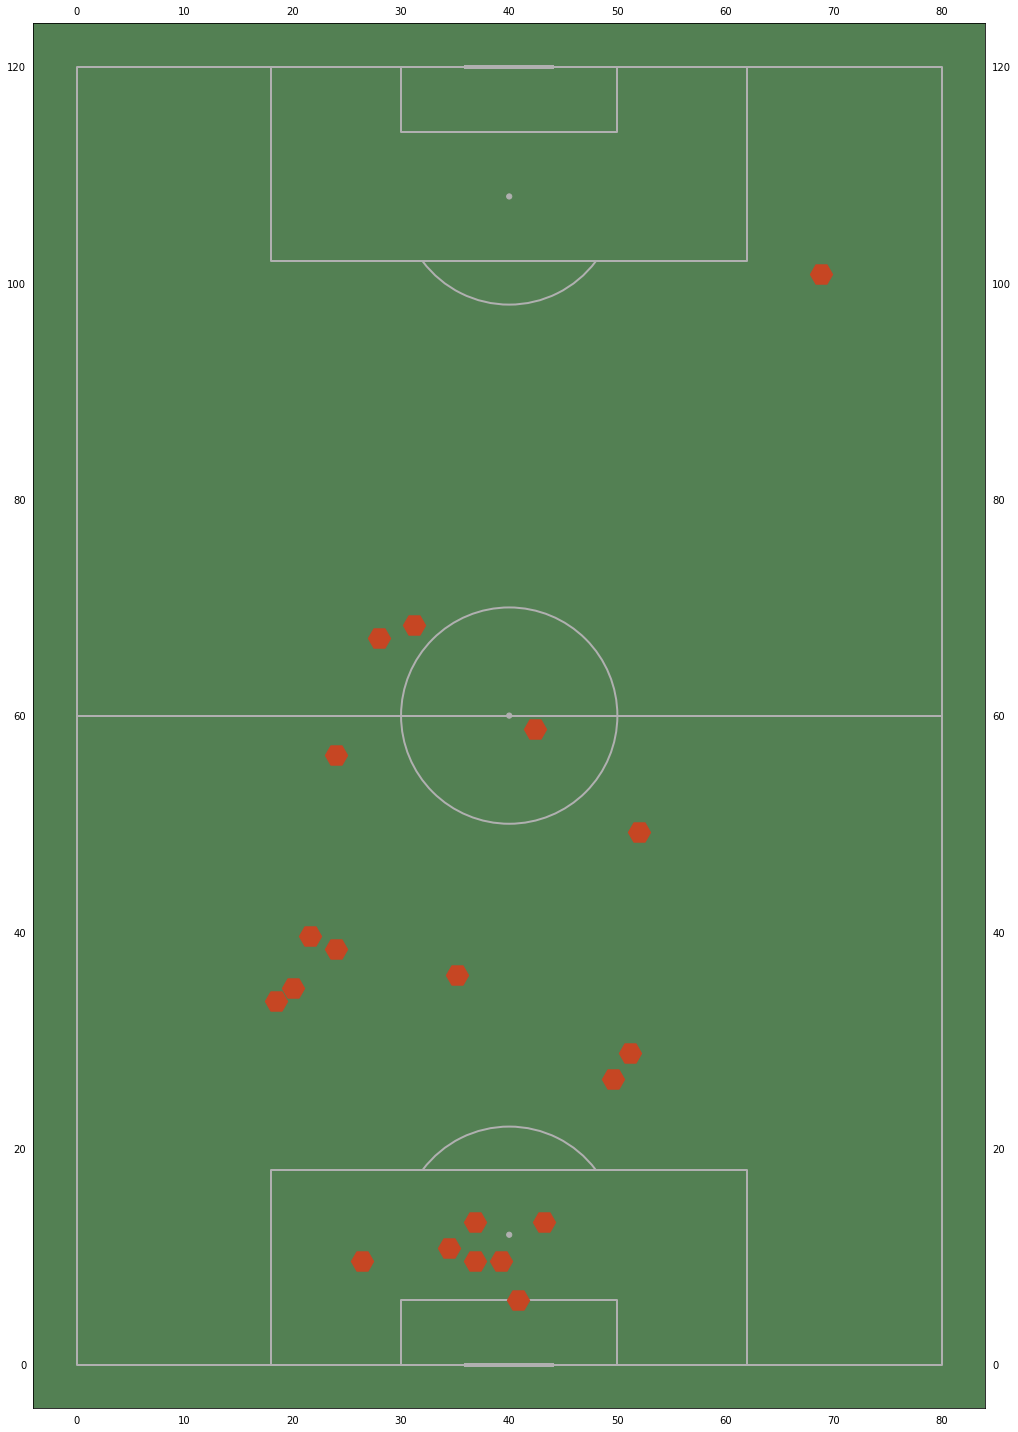

In [55]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomeDef['Y'],dataHomeDef['X'],c='#C64623',s = 500,marker = "H")

In [71]:
shXA = dataAwayShot['X']
shYA = dataAwayShot['Y']
shNameA = dataAwayShot['Player']
shstyA = dataAwayShot['Event']

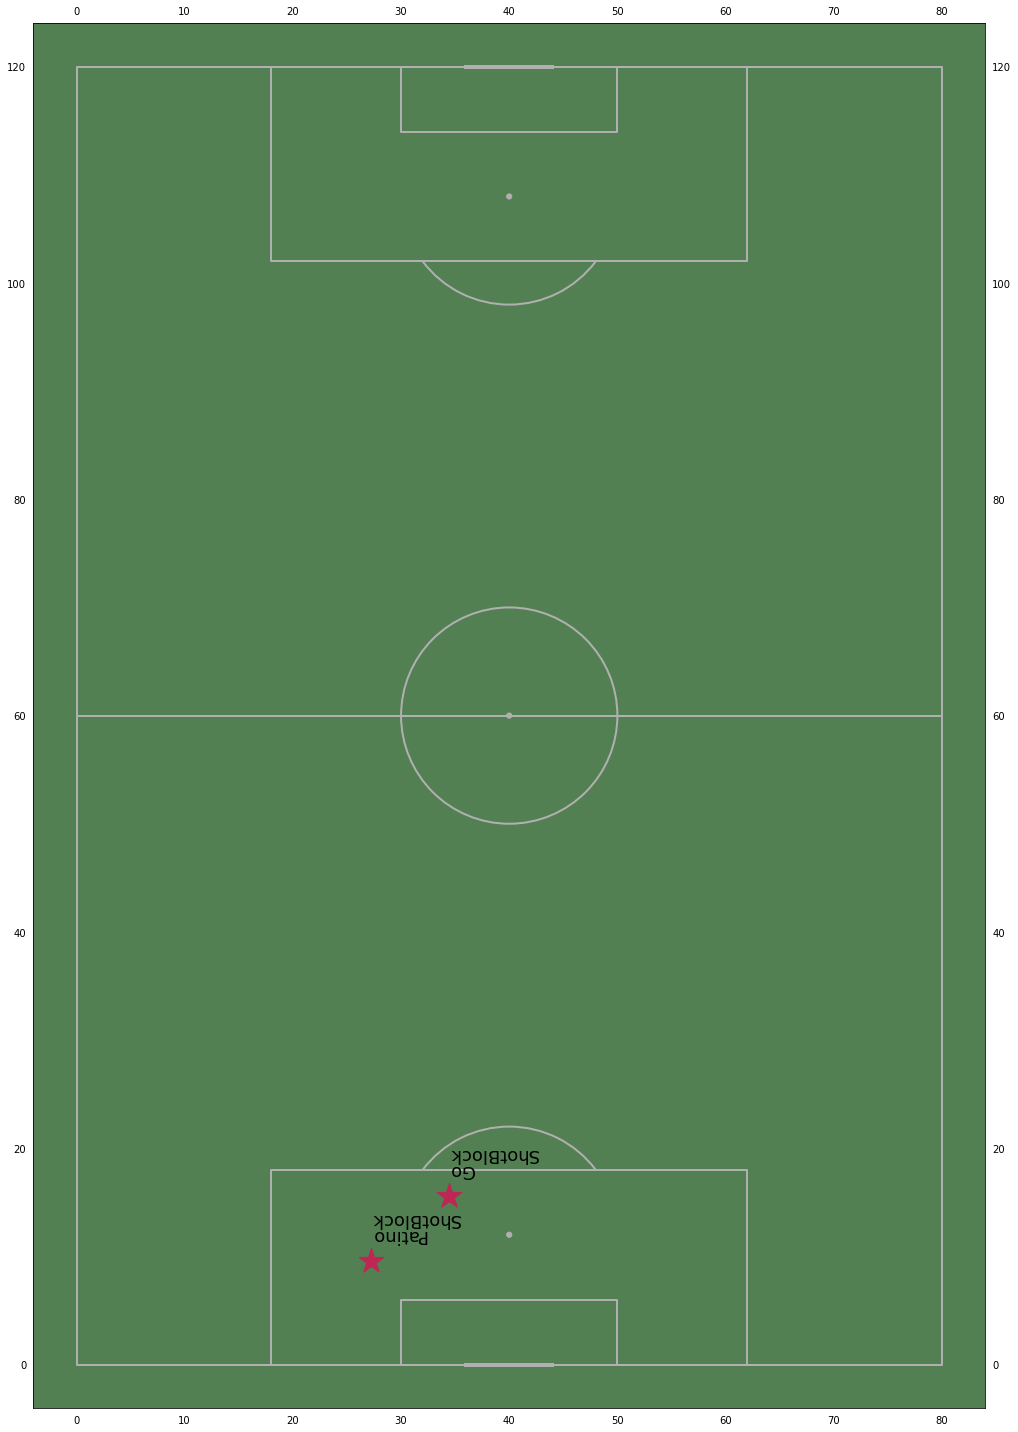

In [94]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayShot['Y'],dataAwayShot['X'],c='#BE2653',s = 700,marker = "*")

for i in range(len(shXA)):
    plt.text(shYA[i],shXA[i]+2,shNameA[i],rotation=180,size = 18)
    plt.text(shYA[i],shXA[i]+3.5,shstyA[i],rotation=180,size = 18)

In [25]:
pDrtxA = dataAwayPass['X']
pDrtyA = dataAwayPass['Y']
pDesxA = dataAwayPass['X2']
pDesyA = dataAwayPass['Y2']
pStyA = dataAwayPass['Event']

In [26]:
pDrtxH = dataHomePass['X']
pDrtyH = dataHomePass['Y']
pDesxH = dataHomePass['X2']
pDesyH = dataHomePass['Y2']
pStyH = dataHomePass['Event']

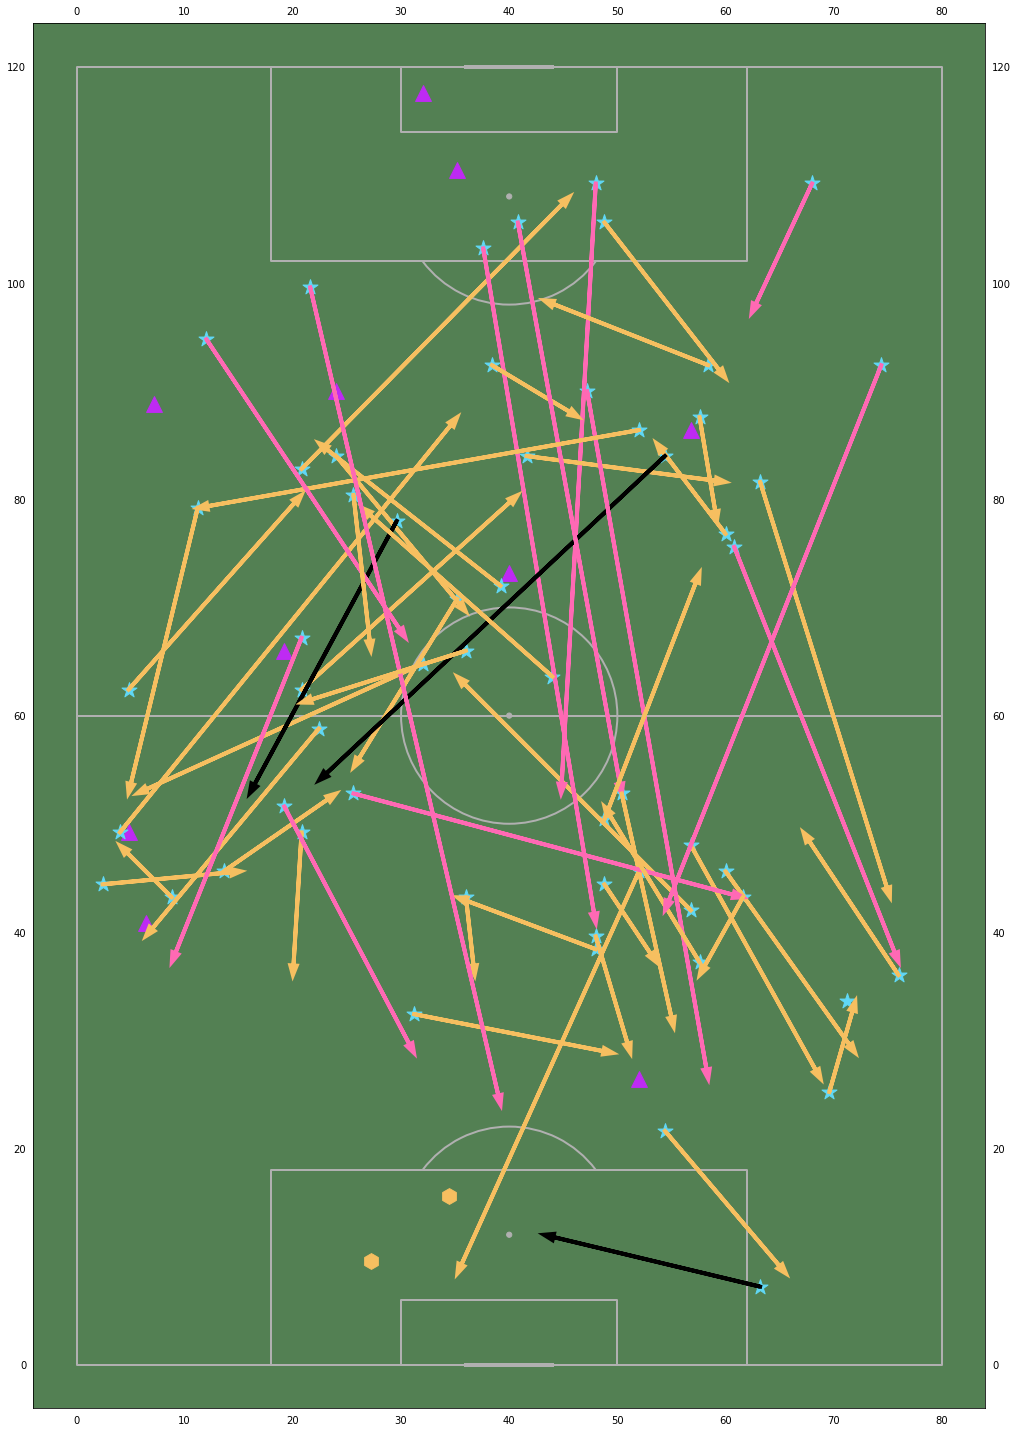

In [28]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#BE2AF3',s = 250,marker = "^")

plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#60D8F6',s = 250 ,marker = '*')

plt.scatter(dataAwayShot['Y'],dataAwayShot['X'],c='#F6BF60',s = 250,marker = "h")
for i in range(len(pStyA)):
    if(pStyA[i] == 'Cross'):
        plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i], color = '#FF69B4',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyA[i] == 'Through'):
        plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i], color = '#000000',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyA[i] == 'Pass'):
         plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i],color ='#F6BF60',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')


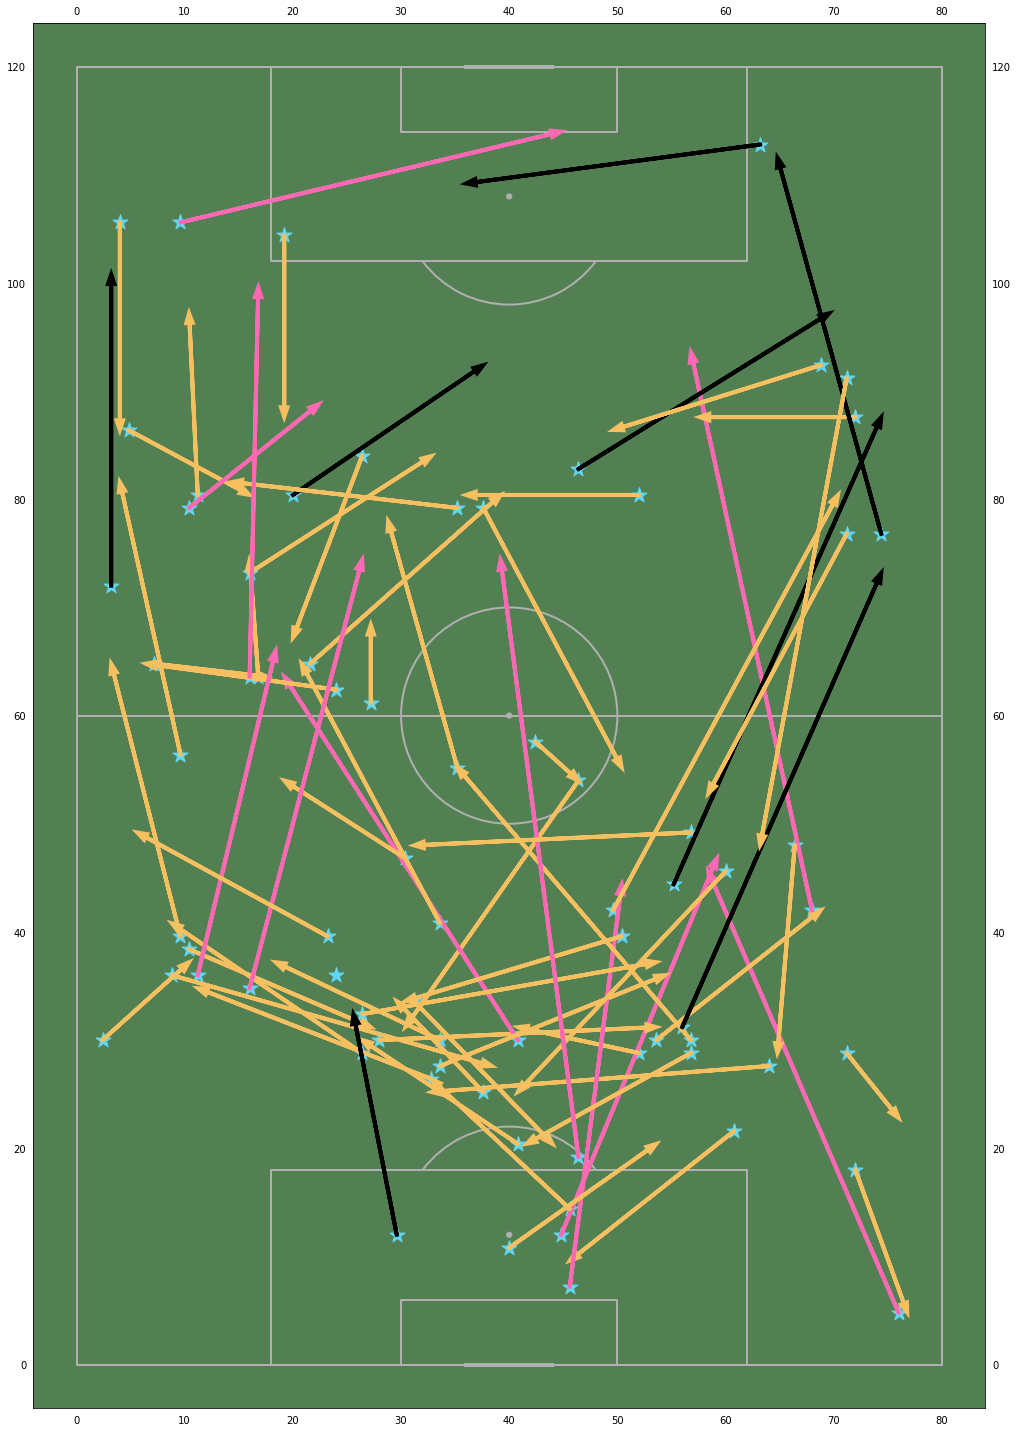

In [34]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#60D8F6',s = 250 ,marker = '*')

for i in range(len(pStyH)):
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Through'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
